In [10]:
from PIL import Image
import numpy as np
from torchvision import transforms
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

no_file_dir = "../data/images/no"
yes_file_dir = "../data/images/yes"

no_file_paths = [os.path.join(no_file_dir, file_name) for file_name in os.listdir(no_file_dir)]
yes_file_paths = [os.path.join(yes_file_dir, file_name) for file_name in os.listdir(yes_file_dir)]


In [11]:
def plot_images(composed_transforms: transforms.transforms.Compose, tumor: str) -> None:
    if tumor == "yes":
        file_paths = yes_file_paths
    elif tumor == "no":
        file_paths = no_file_paths
    else:
        raise Exception(f"Not a valid tumor {tumor}.")
    
    # plot only the first 10 images
    images = [np.asarray(composed_transforms(Image.open(file_path))) for index, file_path in enumerate(file_paths) if index < 10]
    fig = plt.figure(figsize=(20, 20))
    grid = ImageGrid(fig, 111,  # similar to subplot(111)
                     nrows_ncols=(1, 10),  # creates a grid with 1 row and 10 columns
                     axes_pad=0.1)  # pad between axes in inch.

    for ax, im in zip(grid, images):
        # Iterating over the grid returns the Axes.
        ax.imshow(im)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    plt.show()


# Augmentation: None, Tumor: Yes

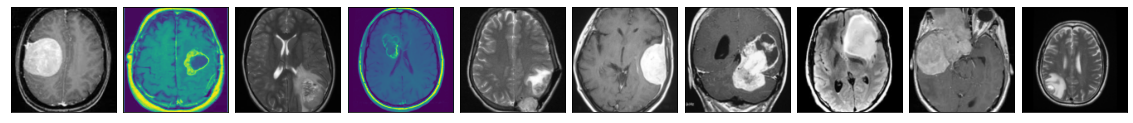

In [12]:
composed_transforms = transforms.Compose(
    [
        transforms.Resize(128),  # resize shortest side to 32 pixels
        transforms.CenterCrop(128)  # crop longest side to 32 pixels at center
    ]
)

plot_images(composed_transforms=composed_transforms, tumor="yes")


# Augmentation: Yes, Tumor: Yes

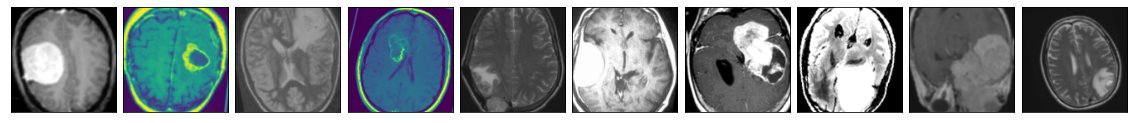

In [21]:
composed_transforms = transforms.Compose(
    [
        transforms.RandomHorizontalFlip(p=0.5),
        transforms.RandomVerticalFlip(p=0.5),
        transforms.RandomEqualize(p=0.25),
        transforms.RandomAutocontrast(p=0.25),
        transforms.RandomRotation(degrees=15),
        transforms.RandomAdjustSharpness(sharpness_factor=np.random.rand() * 2, p=0.5),
        transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 5)),
        transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.4),
        transforms.Resize(140),  # resize shortest side to 140 pixels
        transforms.CenterCrop(140),  # crop longest side to 140 pixels at center
        transforms.RandomCrop(128),  # crop 128 pixels randomly 
    ]
)

plot_images(composed_transforms=composed_transforms, tumor="yes")
